In [7]:
import os
import gpt_functions
import json
import pandas as pd
import seaborn as sns
import json
import pickle
import openai
from bs4 import BeautifulSoup, NavigableString
import matplotlib.pyplot as plt

### Read in the Data:

In [8]:
df = pd.read_csv("captain_marvel_sample.csv") # Here we use a subsample of the data to ensure the code doesn't run forever! Feel free to further cut it down. 

Text(0.5, 1.0, 'Distribution of Scores')

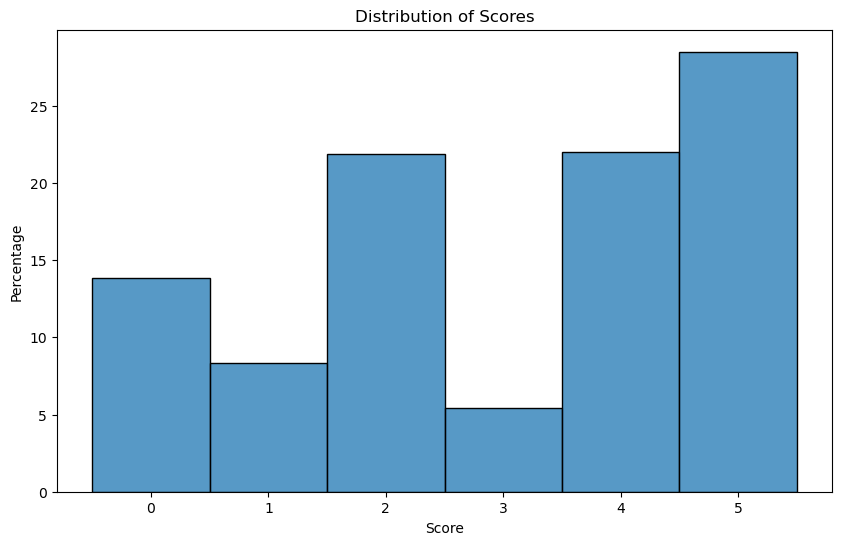

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['score'], discrete=True, stat="percent", common_norm=False, ax=ax)
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Distribution of Scores")

### Prepare GPT Prompts

In [10]:
def make_prompt(text):
   return """Below is a review of a movie. Please read the review and determine whether it is politically motivated (score = 1) or not (score = 0). \n""" + text

### Run ChatGPT Queries

In [ ]:
is_political = []
reasoning = []
for i, row in df.iterrows():
    prompt = make_prompt(row["review"]) # Creates the prompt for that row entry
    response = gpt_functions.ask_GPT_JSON(prompt, json_schema) # Calls the GPT function
    print(response) # Prints the response
    response = json.loads(response) # Converts the response to a dictionary
    is_political.append(response["is_political"]) # Appends the is_political value to the list
    reasoning.append(response["reasoning"]) # Appends the reasoning value to the list

In [ ]:
df['is_political'] = is_political # Adds the is_political column to the dataframe

### Auditing ChatGPT

In this section we create an html that will allow us to quickly and efficiently evaluate chatGPT. All relevant functions are in the "html_function.py" file. 

In [11]:
from html_functions import *

In [ ]:
to_make_html = df.iloc[:50, :] # Here we only take the first 50 rows, and use these to conduct the audit. 
to_make_html = to_make_html.iloc[:,[2, 3, 4]] # Take only selected columns
to_make_html['audit_score'] = "select" # Add a column for the audit score

In [ ]:
to_make_html.to_html("captain_marvel_sample_labeled.html", escape=False) # Save the HTML file

In [ ]:
tables = [to_make_html.to_html(escape=False)] # Create a list of tables to be converted to HTML

In [ ]:
soup = make_tab_table(tables)
make_final_html(soup, "captain_marvel_sample_labeled.html") # Create the final HTML file

In [12]:
# Below are my scores from the audit. If you're running these for the demo, this will do. 
audit_scores=[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
to_make_html['audit_scores'] = audit_scores
pd.crosstab(to_make_html['is_political'], to_make_html['audit_scores']).to_latex('crosstab.tex')